Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # wrapper for matplotlib, enables plotting of certain things
from sklearn.ensemble import RandomForestClassifier # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.datasets import make_classification

# Test the random tree classifier

Diagnosis is the target y

Diagnosis is either B (Benign) or M (Malign), binary classification

In [ ]:
dataset_cols = ["ID", "Diagnosis", "radius1", "texture1 ", "perimeter1", "area1", "smoothness1", "compactness1 ", "concavity1", "concave points1", "symmetry1", "fractal dimension1",
        "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave points2", "symmetry2", "fractal dimension2",
        "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave points3", "symmetry3", "fractal dimension3"]

In [ ]:
df = pd.read_csv("wdbc.data") # Read data
df.columns = dataset_cols # Set the names of the columns
df = df.drop(["ID"], axis=1) # Drop ID since it's irrelevant
dataset_cols = dataset_cols[1:] # Remove ID from the label list

In [ ]:
df.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
df["Diagnosis"] = (df["Diagnosis"] == "M").astype(int)

In [ ]:
df.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
# Plot the different features vs the diagnosis
for label in df.columns[1:]: # Skip index 0 since it's the diagnosis
  plt.scatter(df[label], df["Diagnosis"])
  plt.title(label)
  plt.ylabel("Cancer diagnosis")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
df_train, df_valid, df_test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Normalize the features to improve classification
def scale_dataset(dataframe, oversample=False):

  X = dataframe[dataframe.columns[1:]].values # All data up to the last item
  y = dataframe[dataframe.columns[0]].values # Last column of the matrix

  scaler = StandardScaler()
  X = scaler.fit_transform(X,y) # Normalize

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y) # Take more of the class with fewer items until they have the same amount

  # Below is what we want to do - have to reshape y first to 2D
  # data = np.hstack((X, y)) # horisontal stack
  data = np.hstack((X, np.reshape(y, (-1, 1)))) # horisontal stack. (-1, 1) gets evaluated as (len(y), 1)

  return data, X, y

In [ ]:
print(len(df_train[df_train["Diagnosis"] == 1])) # Malign
print(len(df_train[df_train["Diagnosis"] == 0])) # Benign

118
222


In [ ]:
# Normalize all the data. Oversample the training data to have equal numbers of malign/benign
train, X_train, y_train = scale_dataset(df_train, oversample=False)
# train, X_train, y_train = scale_dataset(df_train.astype(int), oversample=True) # only oversample the data to improve the training
valid, X_valid, y_valid = scale_dataset(df_valid, oversample=False)
test, X_test, y_test = scale_dataset(df_test, oversample=False)

In [ ]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier(...)
# print(clf.predict(X_valid))
print(clf.score(X_valid, y_valid)) # Test on validation data and retune if needed. ~95%
# print("Predict probabilities: ")
# print(clf.predict_proba(X_valid))

0.956140350877193


In [ ]:
print(clf.score(X_test, y_test))  # Result for test data: 94%

0.9385964912280702


# KNN - K nearest neighbors

First try just KNN, then PCA+KNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # wrapper for matplotlib, enables plotting of certain things
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
dataset_cols = ["ID", "Diagnosis", "radius1", "texture1 ", "perimeter1", "area1", "smoothness1", "compactness1 ", "concavity1", "concave points1", "symmetry1", "fractal dimension1",
        "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave points2", "symmetry2", "fractal dimension2",
        "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave points3", "symmetry3", "fractal dimension3"]

In [ ]:
df = pd.read_csv("wdbc.data") # Read data
df.columns = dataset_cols # Set the names of the columns
df = df.drop(["ID"], axis=1) # Drop ID since it's irrelevant
dataset_cols = dataset_cols[1:] # Remove ID from dataset_cols

In [ ]:
df.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


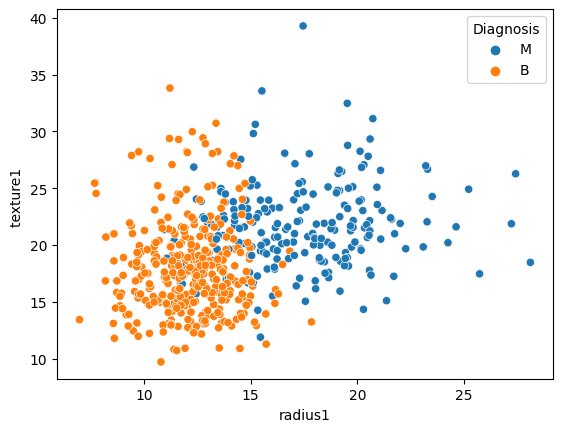

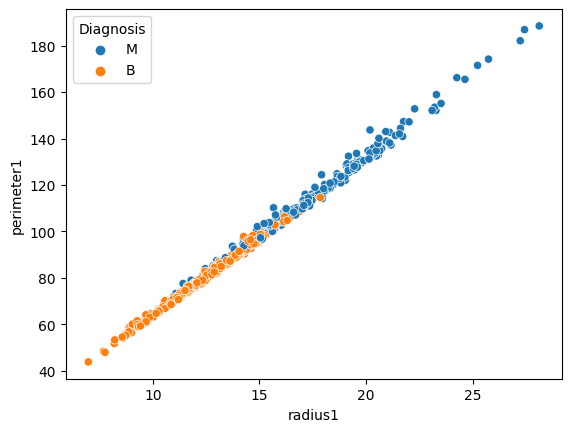

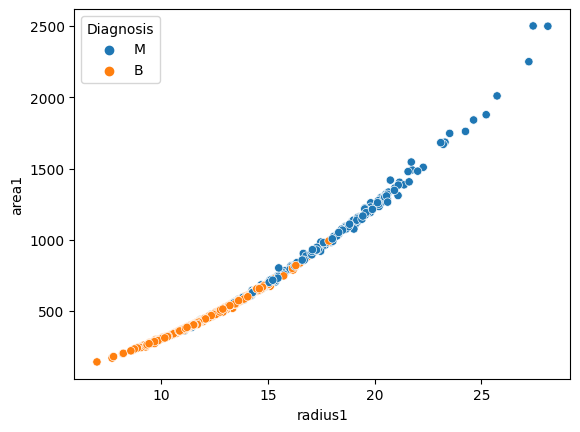

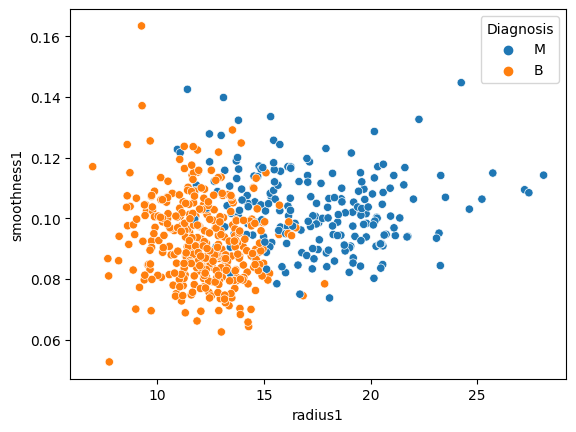

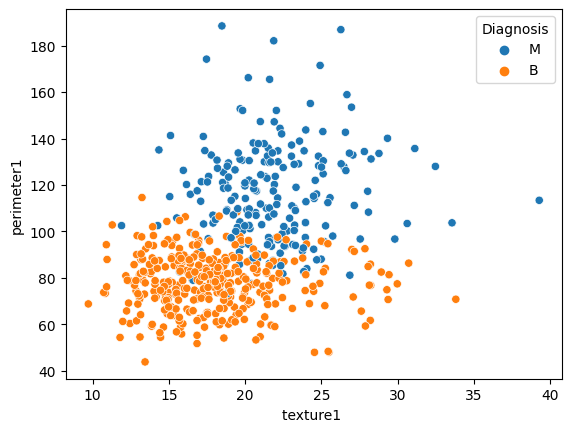

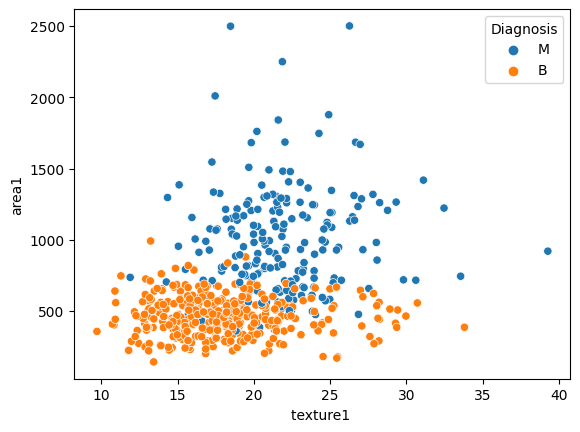

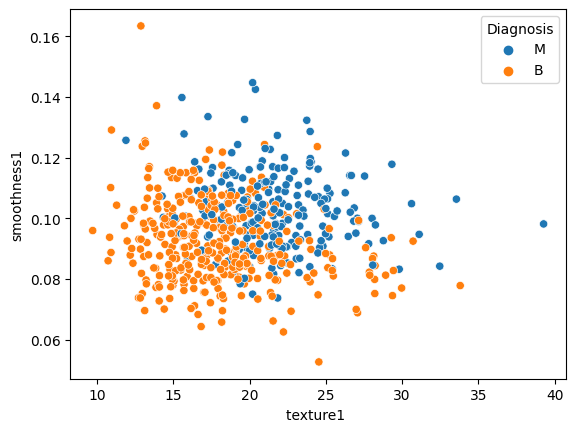

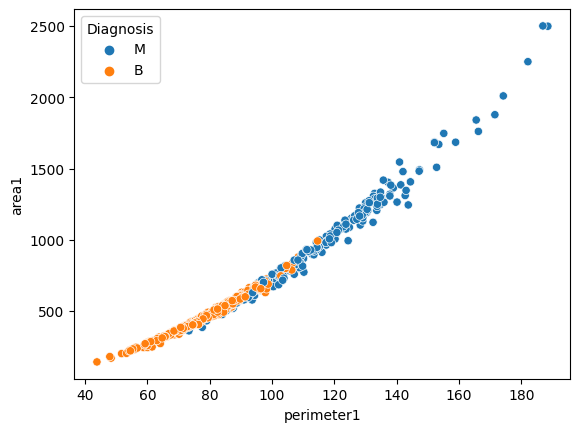

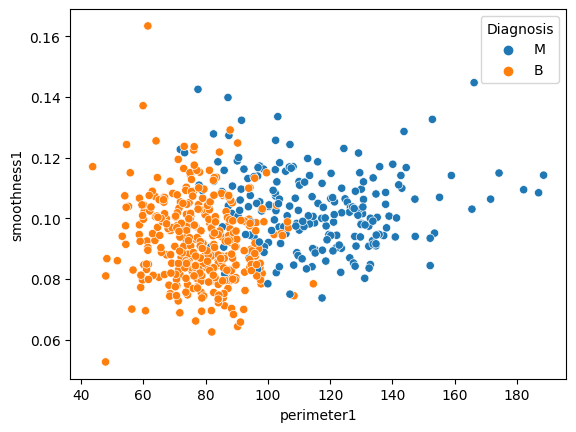

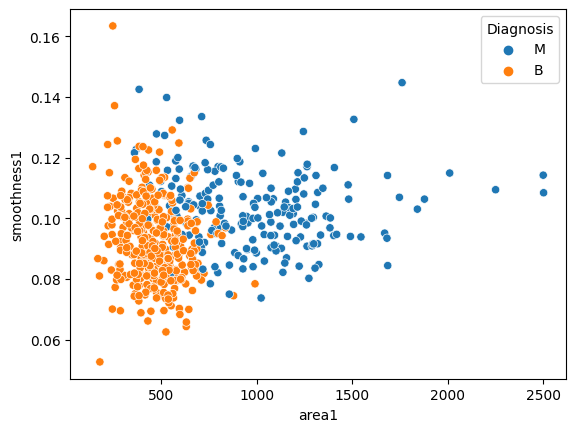

In [ ]:
# Print all features against one another on x/y in a scatter plot
for i in range(1,len(dataset_cols)-25): # -25 to not plot everything
  for j in range(i+1, len(dataset_cols)-25):
    x_label = dataset_cols[i]
    y_label = dataset_cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue="Diagnosis")
    plt.show()

In [ ]:
df_train, df_valid, df_test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
# Normalize all the data. Oversample the training data to have equal numbers of malign/benign
train, X_train, y_train = scale_dataset(df_train, oversample=False)
# train, X_train, y_train = scale_dataset(df_train.astype(int), oversample=True) # only oversample the data to improve the training
valid, X_valid, y_valid = scale_dataset(df_valid, oversample=False)
test, X_test, y_test = scale_dataset(df_test, oversample=False)

**KNN**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Validation data - can retune based on this
# Result: ~97%
y_valid_predict = knn_model.predict(X_valid)
print(classification_report(y_valid, y_valid_predict))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        68
           M       1.00      0.93      0.97        46

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# Test data - final result of how well the prediction works
# Result: ~96%

y_test_predict = knn_model.predict(X_test)
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           B       0.94      0.99      0.96        69
           M       0.98      0.91      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**PCA + KNN**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_comps = 7 # Nr of PCA components

In [ ]:
pca = PCA(n_components=n_comps)
transformed_X = pca.fit_transform(X_train) # X is the feature matrix

In [ ]:
X_train.shape

(340, 30)

In [ ]:
transformed_X.shape

(340, 10)

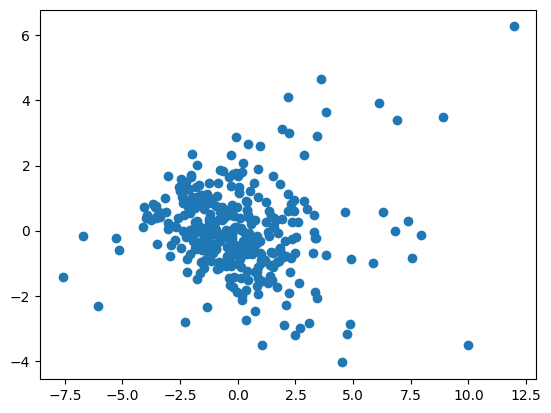

In [ ]:
plt.scatter(transformed_X[:,1], transformed_X[:,4])
plt.show()

In [ ]:
knn_model_pca = KNeighborsClassifier(n_neighbors=n_comps)
knn_model_pca.fit(transformed_X, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Validation data - can retune based on this
# Result ~94%

transformed_X_valid = pca.fit_transform(X_valid) # X is the feature matrix
y_valid_predict = knn_model_pca.predict(transformed_X_valid)
print(classification_report(y_valid, y_valid_predict))

              precision    recall  f1-score   support

           B       0.92      0.99      0.95        68
           M       0.98      0.87      0.92        46

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
# Test data - final result of how well the prediction works
# Result ~90%
transformed_X_test = pca.fit_transform(X_test) # X is the feature matrix
y_test_predict = knn_model_pca.predict(transformed_X_test)
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           B       0.89      0.96      0.92        69
           M       0.93      0.82      0.87        45

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114

